# 4.2 Classifying newswires: A multiclass classification example

- Because we have many classes, this problem is an instance of **multiclass classification**
- Because each data point should be classified into only one category, the problem is an instance of **single-label multiclass classification**.
- **Multilabel multiclass classification** when multiple labels can be assigned to one point.

## Downloading and Understanding Dataset

In [5]:
import numpy as np
# Reuters dataset, a set of short newswires and their topics, published by Reuters in 1986
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# The argument num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data

In [6]:
len(train_data), len(test_data)

(8982, 2246)

In [7]:
# each example is a list of indices (word index)
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
# indices are shifted by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
# The label associated with an example is an integer between 0 and 45—a topic index:
train_labels[10]

3

## Preparing Data

In [10]:
## Transform Data into the Multi-hot encoding as in the Movie Classification Example
import numpy as np

def vectorize_data(data, num_words=10000):
    result = np.zeros(shape=(len(data), num_words))
    for row in range(len(data)):
        for word in data[row]:
            result[row][word] = 1
    return result

In [11]:
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)

## Vectorize the Labels:
 There are two possibilities to vectorize the labels:
  - Cast the label list as an integer tensor
  - Use One-Hot Encoding: One-hot encoding is a widely used format for categorical data, also called **categorical encoding**.

In [12]:
# One Hot encoding
def to_one_hot(labels, num_topics=46):
    results = np.zeros(shape=(len(labels), num_topics))
    for i in range(len(labels)):
        results[i][labels[i]] = 1
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)
# Built in Solution (to_categorical is exactly the same to one-hot)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## Building the Model

If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an information bottleneck.

**What is the Information Bottleneck?**
It's when the layer is not capable of representing the data (due to it's limited space of representation i.e #units), which will cause data drop. This will affect later layers in the stack.

In [34]:
from tensorflow.keras import layers
from tensorflow import keras
model = keras.Sequential([
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=46, activation="softmax"), ## The output is one of 46 possible outputs
])

**Softmax** means the model will output a probability distribution over the 46 different output classes—for every input sample, the model will produce a 46-dimensional output vector, where output[i] is the probability that the sample belongs to class i. **The 46 scores will sum to 1.**

The best loss function to use in this case is **categorical_crossentropy**.

In [35]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [36]:
# validation sets
x_val = x_train[:1000]
y_val = y_train[:1000]

In [37]:
history = model.fit(x_train,y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/10
18/18 [==============================] - 1s 41ms/step - loss: 1.9803 - accuracy: 0.5799 - val_loss: 1.2229 - val_accuracy: 0.7220
Epoch 2/10
18/18 [==============================] - 0s 19ms/step - loss: 1.0919 - accuracy: 0.7586 - val_loss: 0.7517 - val_accuracy: 0.8370
Epoch 3/10
18/18 [==============================] - 0s 19ms/step - loss: 0.7730 - accuracy: 0.8307 - val_loss: 0.5507 - val_accuracy: 0.9010
Epoch 4/10
18/18 [==============================] - 0s 18ms/step - loss: 0.5648 - accuracy: 0.8795 - val_loss: 0.3778 - val_accuracy: 0.9410
Epoch 5/10
18/18 [==============================] - 0s 17ms/step - loss: 0.4266 - accuracy: 0.9095 - val_loss: 0.2782 - val_accuracy: 0.9500
Epoch 6/10
18/18 [==============================] - 0s 18ms/step - loss: 0.3038 - accuracy: 0.9360 - val_loss: 0.2293 - val_accuracy: 0.9580
Epoch 7/10
18/18 [==============================] - 0s 21ms/step - loss: 0.2732 - accuracy: 0.9375 - val_loss: 0.1784 - val_accuracy: 0.9660
Epoch 8/10
18

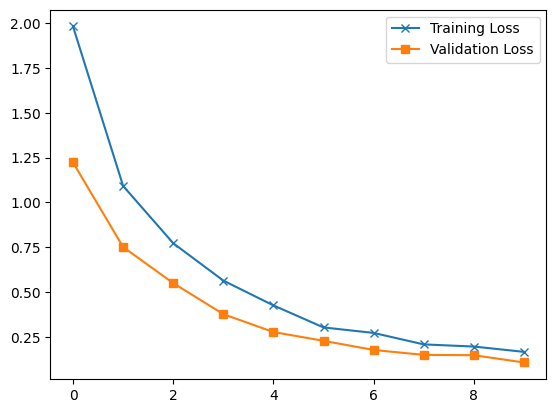

In [38]:
import matplotlib.pyplot as plt
plt.plot(list(range(10)), history.history['loss'], marker="x", label="Training Loss")
plt.plot(list(range(10)), history.history['val_loss'], marker="s", label="Validation Loss")
plt.legend()

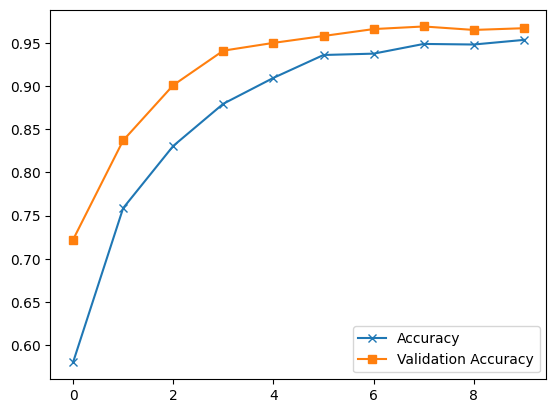

In [39]:
plt.plot(list(range(10)), history.history['accuracy'], marker="x", label="Accuracy")
plt.plot(list(range(10)), history.history['val_accuracy'], marker="s", label="Validation Accuracy")
plt.legend()

In [41]:
## Model Evaluate
model.evaluate(x_test, y_test)

71/71 [==============================] - 1s 9ms/step - loss: 1.1352 - accuracy: 0.7894


[1.1352028846740723, 0.7894033789634705]

In [ ]:
# To encode the labels would be to cast them as an integer tensor
y_train = np.array(train_labels)
y_test = np.array(test_labels)

## Example Wrap Up
- If you’re trying to classify data points among N classes, your model should end with a Dense layer of size N.
- In a single-label, multiclass classification problem, your model should end with a softmax activation so that it will output a probability distribution over the N output classes.
- Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the model and the true distribution of the targets.

- There are two ways to handle labels in multiclass classification:
    - Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function
    - Encoding the labels as integers and using the sparse_categorical_crossentropy loss function

- If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your model due to intermediate layers that are too small. 